## SVM Checker

In [147]:
%matplotlib inline
!pip install cvxopt
import svm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import itertools
import scipy.ndimage




def example(num_samples=100, num_features=2, grid_size=20):
    
    samples = np.matrix(np.random.normal(size=num_samples * num_features)
                        .reshape(num_samples, num_features))
    
    labels = 2 * (samples.sum(axis=1) > 0) - 1.0
    
    trainer = svm.SVMTrainer(svm.Kernel.gaussian(sigma=1.0))
    
    predictor = trainer.train(samples, labels)

    plot(predictor, samples, labels, grid_size)


def plot(predictor, X, y, grid_size):
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, grid_size),
        np.linspace(y_min, y_max, grid_size),
        indexing='ij'
    )
    
    flatten = lambda m: np.array(m).reshape(-1,)

    result = []
    
    for (i, j) in itertools.product(range(grid_size), range(grid_size)):
        point = np.array([xx[i, j], yy[i, j]]).reshape(1, 2)
        result.append(predictor.predict(point))

    Z = np.array(result).reshape(xx.shape)
    Z = scipy.ndimage.gaussian_filter(Z, 1)
   
    plt.contourf(
        xx, yy, Z,
        cmap=cm.Paired,
        levels=[-0.01, 0.01],
        extend='both',
        alpha=0.7
    )
    
    
    plt.scatter(
        flatten(X[:, 0]),
        flatten(X[:, 1]),
        c=flatten(y),
        cmap=cm.Paired
    )
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

[[  1.62702186e-01   1.27918313e-02]
 [  1.14289456e+00   4.56251036e-01]
 [  8.37786839e-01  -1.26055687e+00]
 [ -3.26372638e-01   5.64978594e-01]
 [  8.85271224e-01   2.02262645e-01]
 [  1.76945061e+00   1.11306594e+00]
 [ -8.32502649e-01   5.82446847e-01]
 [ -6.56405973e-01  -8.37668422e-01]
 [  8.86932918e-01  -8.32852090e-01]
 [  3.77692488e-02   2.75687580e-01]
 [  9.48823256e-01   1.34788441e+00]
 [ -1.91814786e+00   8.47663672e-01]
 [ -3.92230128e-01  -4.21349661e-01]
 [ -2.78897409e-02  -4.87288009e-01]
 [  3.90525609e-01  -9.71010282e-01]
 [ -1.36617390e+00   1.10444344e+00]
 [ -8.13354828e-01  -5.78666043e-01]
 [ -1.42747132e-01  -7.73951157e-01]
 [  5.76345454e-01  -1.06500497e+00]
 [  6.39945655e-01  -1.57440979e-01]
 [ -8.11230864e-01  -2.39142304e-01]
 [  7.21179469e-02  -3.65466870e-02]
 [ -1.27196627e+00  -7.31560589e-01]
 [  1.78132295e-01  -7.95049979e-01]
 [  8.32841074e-01  -3.49988984e-03]
 [  1.02305922e+00  -1.23980552e+00]
 [ -3.82041652e-01   2.05103815e+00]
 

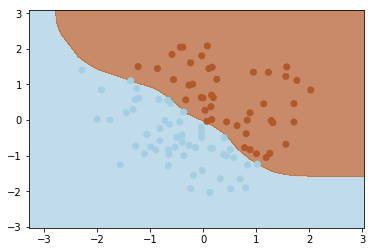

In [148]:
example()